# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= green> GREEN</font>___

In [376]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [377]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [378]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [379]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [380]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [381]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [382]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [383]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [384]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [385]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [386]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [387]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [388]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<font color= green>___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [389]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [390]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [391]:
df2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [392]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [393]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [394]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [395]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [396]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [397]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [398]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [399]:
# Removing 'Prospect ID' column since it is unique for everyone
df_final = df3.drop('Prospect ID', axis=1)
df_final.shape


(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [400]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [401]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


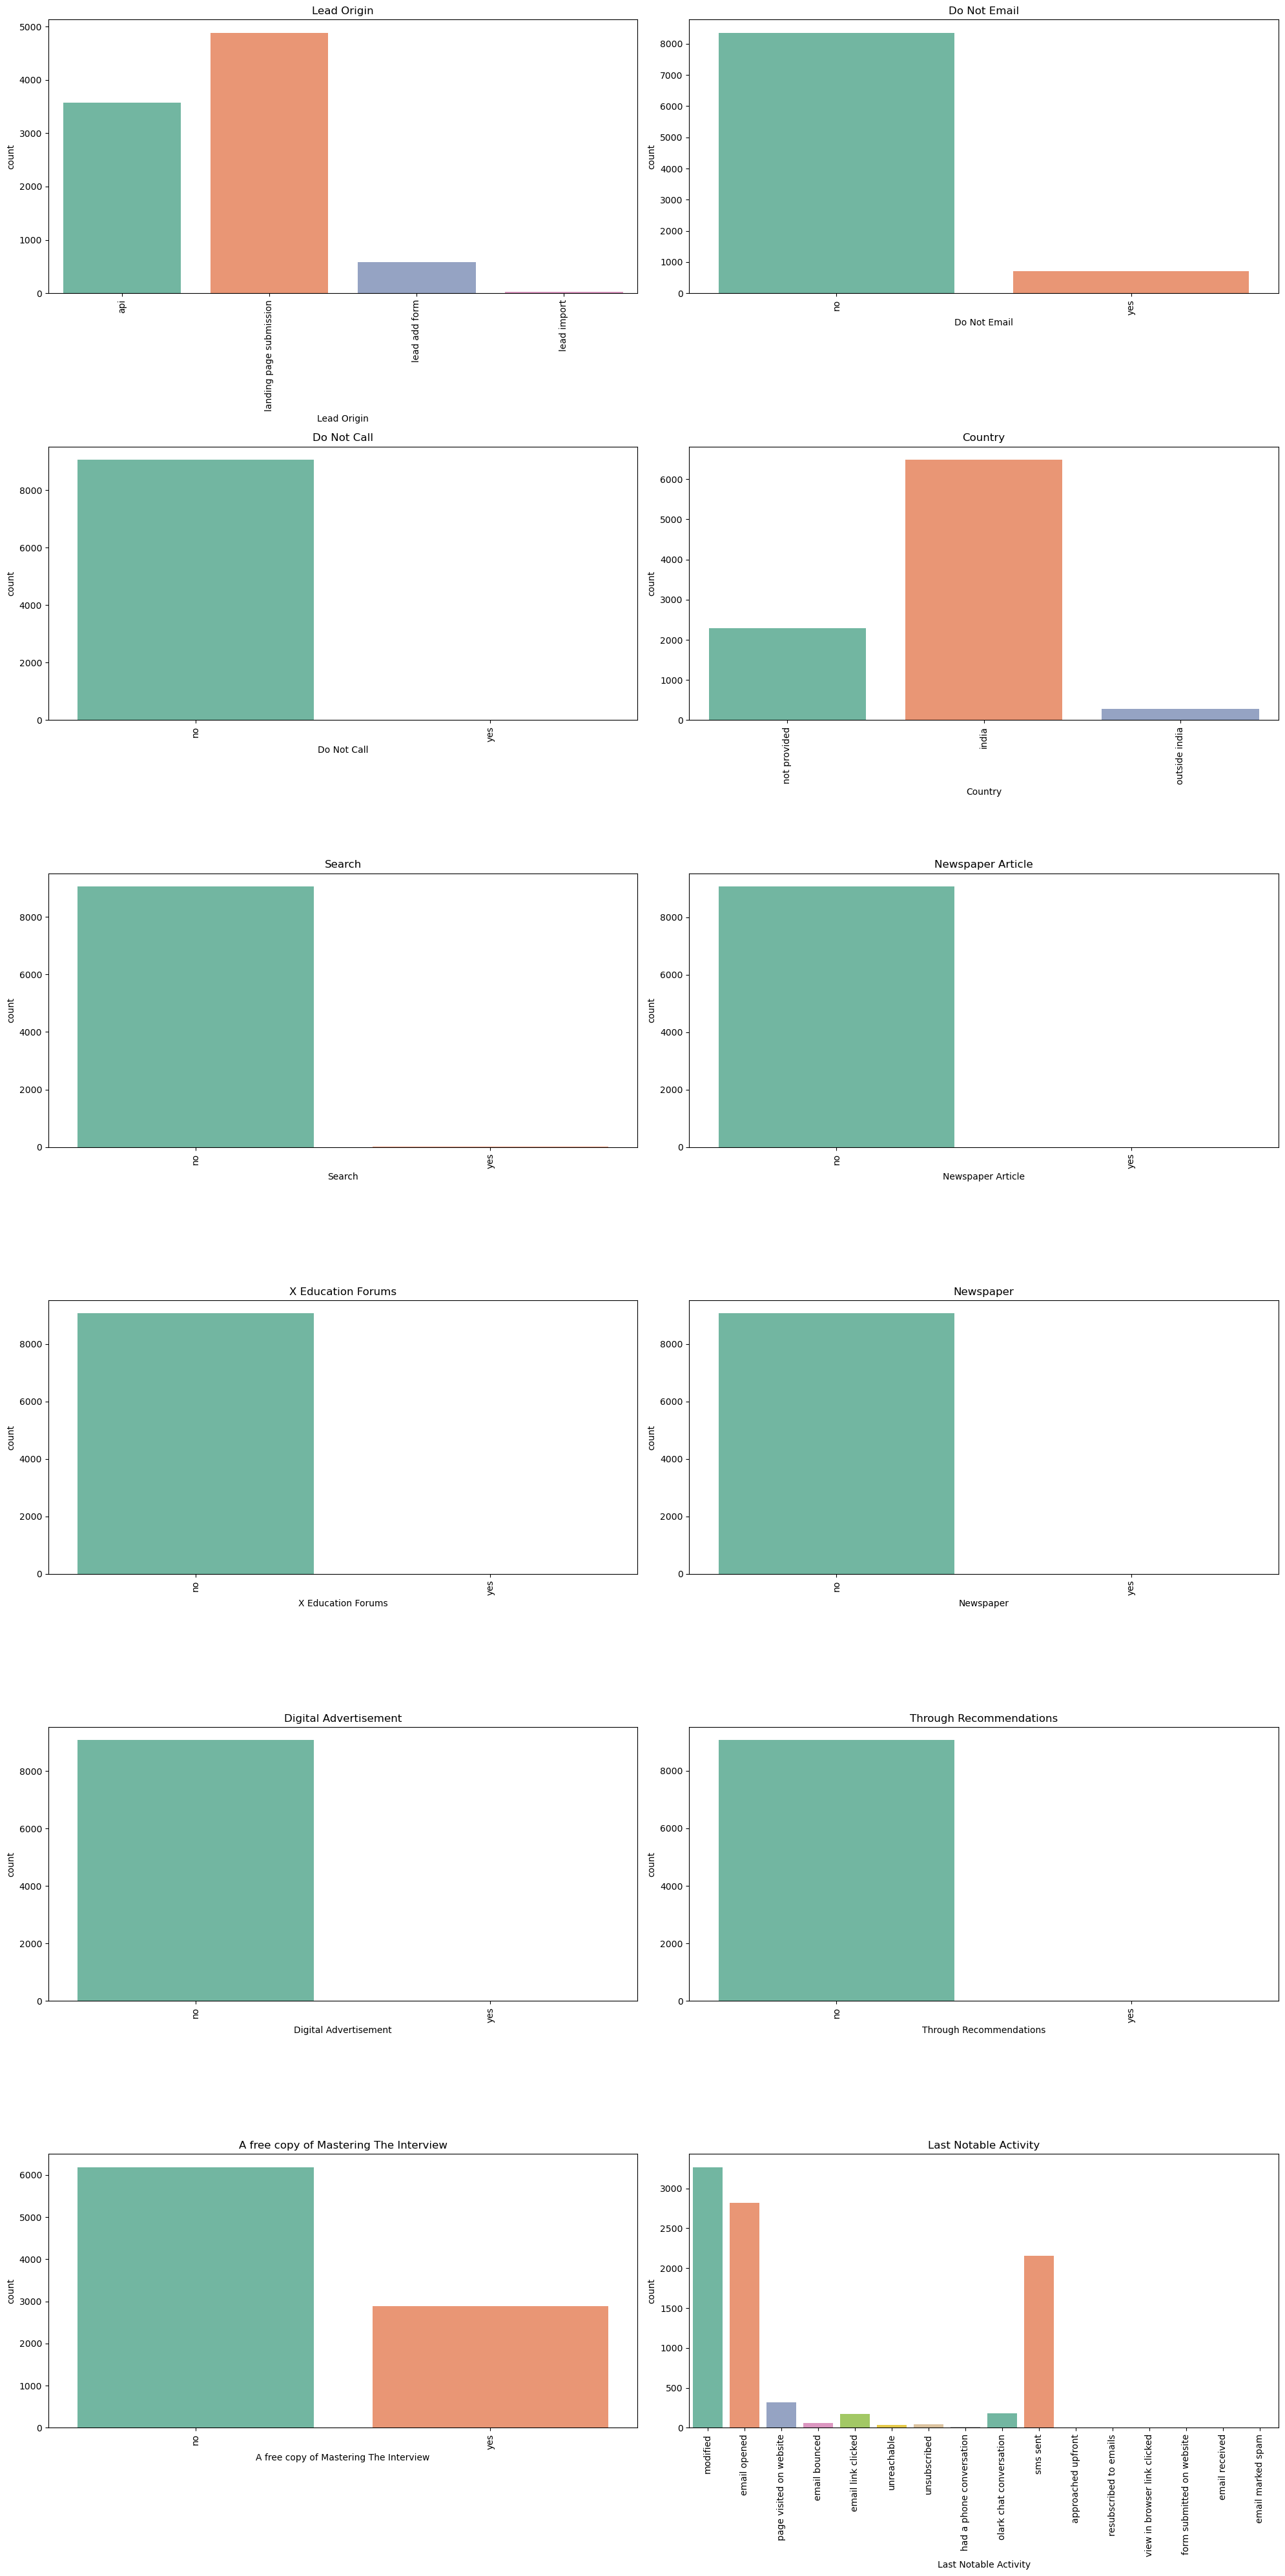

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the categorical columns from df_final that are appropriate for count plots
categorical_columns = [
    'Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search', 
    'Newspaper Article', 'X Education Forums', 'Newspaper', 
    'Digital Advertisement', 'Through Recommendations', 
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Set a color palette for the count plots
color_palette = 'Set2'  # You can change this to any valid seaborn palette, like 'Pastel1', 'Blues', etc.

# Plotting the countplots for selected columns
plt.figure(figsize=(20, 40))

# Loop through the categorical columns and create subplots for each
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 2, i)
    sns.countplot(data=df_final, x=column, palette=color_palette)
    plt.title(column)
    plt.xticks(rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


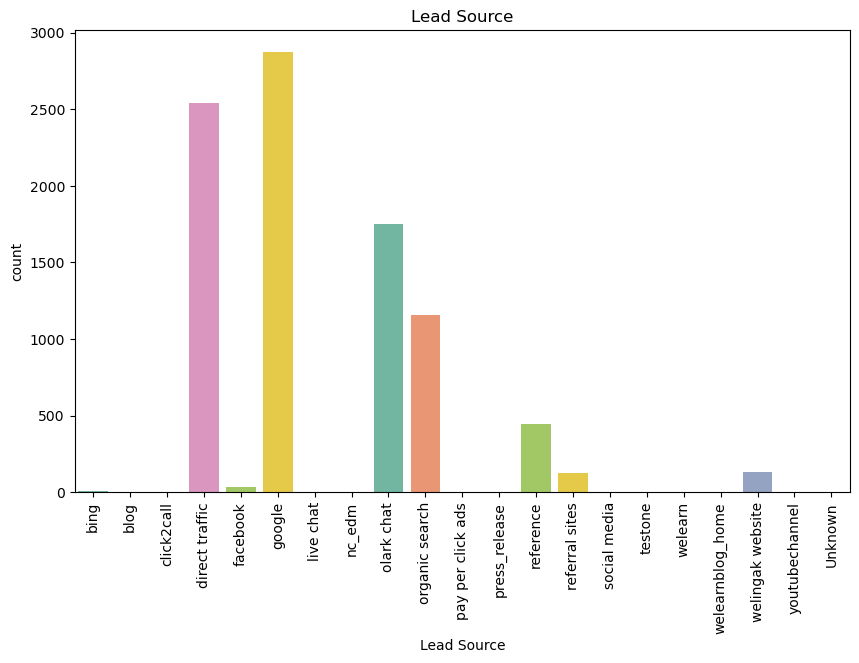

In [403]:


# Ensure 'Lead Source' column is of type 'category'
if df_final['Lead Source'].dtype != 'category':
    df_final['Lead Source'] = df_final['Lead Source'].astype('category')

# Add 'Unknown' category if not already present
if 'Unknown' not in df_final['Lead Source'].cat.categories:
    df_final['Lead Source'] = df_final['Lead Source'].cat.add_categories('Unknown')

# Now, fill missing values with 'Unknown'
df_final['Lead Source'] = df_final['Lead Source'].fillna('Unknown')

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=df_final['Lead Source'], palette='Set2')  # Set2 is a color palette
plt.title('Lead Source')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



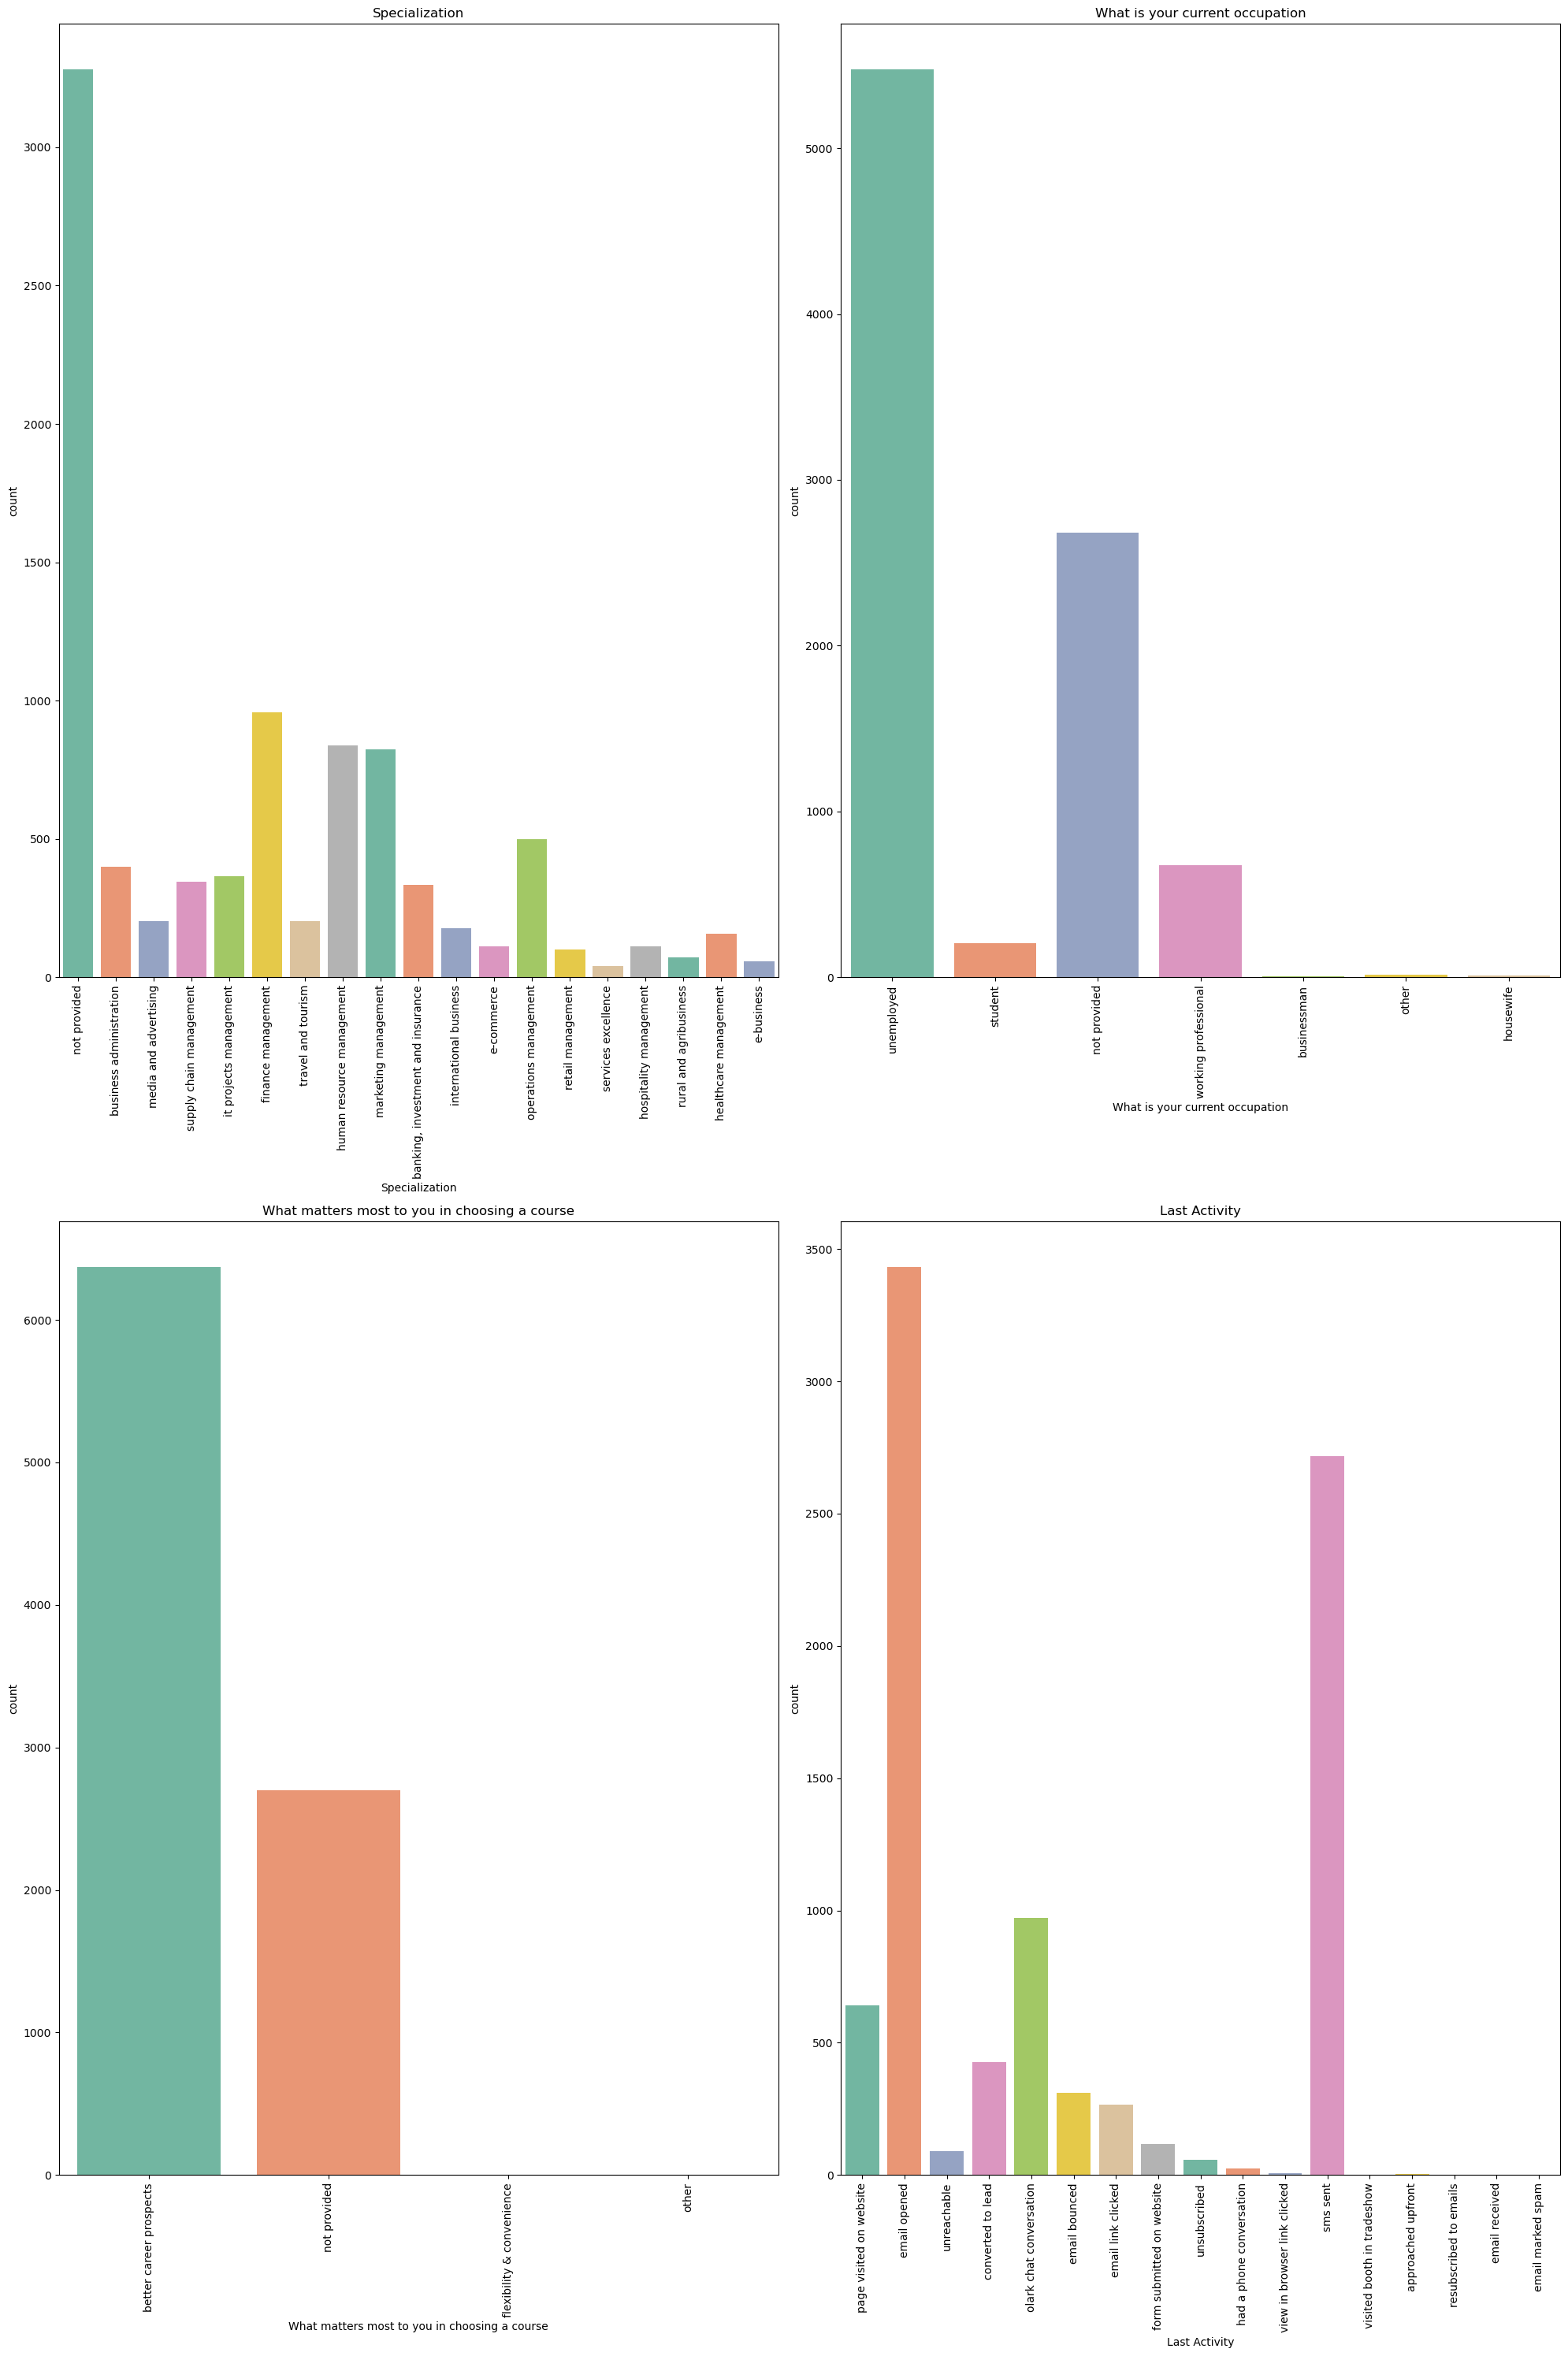

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the categorical columns from df_final that are appropriate for count plots
categorical_columns_2 = [
    'Specialization', 'What is your current occupation', 
    'What matters most to you in choosing a course', 'Last Activity'
]

# Set a color palette for the count plots
color_palette = 'Set2'  # You can change this to any valid seaborn palette, like 'Pastel1', 'Blues', etc.

# Plotting the countplots for selected columns
plt.figure(figsize=(20, 30))

# Loop through the categorical columns and create subplots for each
for i, column in enumerate(categorical_columns_2, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_final, x=column, palette=color_palette)
    plt.title(column)
    plt.xticks(rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [504]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


Converted
0    5679
1    3561
Name: count, dtype: int64


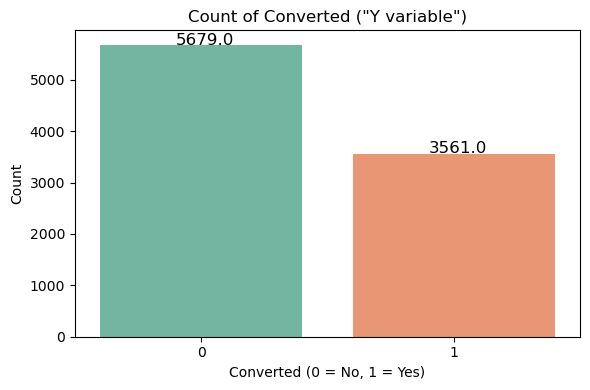

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values and their counts in the 'Converted' column
print(df['Converted'].value_counts())

# If necessary, fill missing values in 'Converted' and ensure it is of integer type
df['Converted'] = df['Converted'].fillna(0).astype(int)

# Create the countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Converted', data=df, palette='Set2')

# Add a title and labels
plt.title('Count of Converted ("Y variable")')
plt.ylabel('Count')
plt.xlabel('Converted (0 = No, 1 = Yes)')

# Add annotations on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 5), fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


#### 2.1.1. Numerical Variables

In [406]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9074 non-null   object  
 1   Lead Source                                    9074 non-null   category
 2   Do Not Email                                   9074 non-null   object  
 3   Do Not Call                                    9074 non-null   object  
 4   Converted                                      9074 non-null   int64   
 5   TotalVisits                                    9074 non-null   float64 
 6   Total Time Spent on Website                    9074 non-null   int64   
 7   Page Views Per Visit                           9074 non-null   float64 
 8   Last Activity                                  9074 non-null   object  
 9   Country                                       

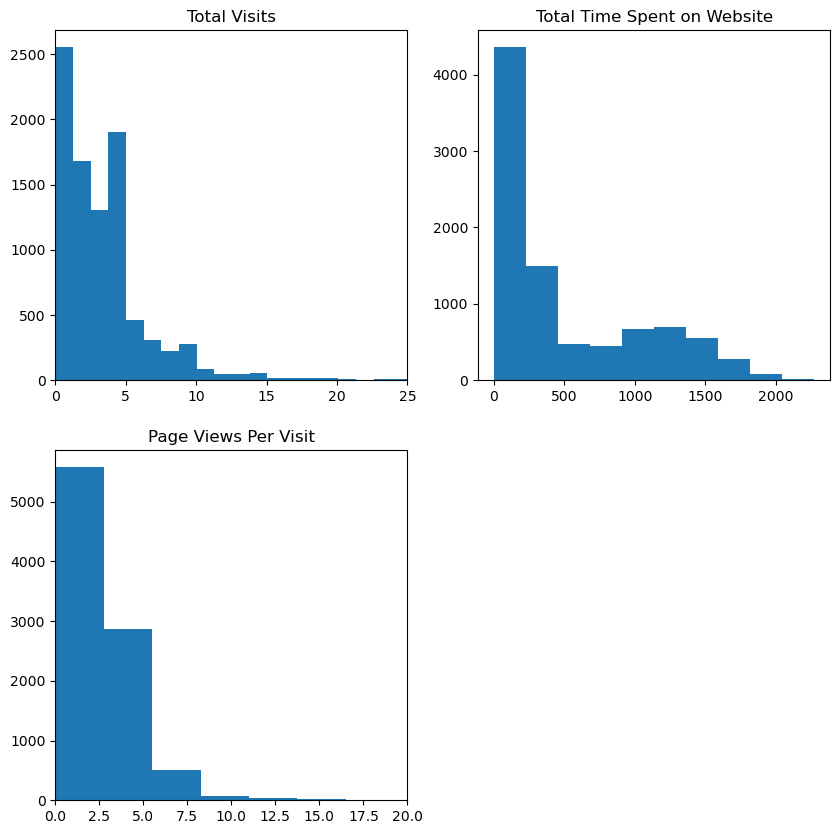

In [407]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

Lead Origin unique values: ['api' 'landing page submission' 'lead add form' 'lead import']
Lead Source unique values: ['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'reference' 'welingak website' 'facebook' 'blog' 'pay per click ads'
 'bing' 'social media' 'welearn' 'click2call' 'live chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']
Converted unique values: ['0' '1']


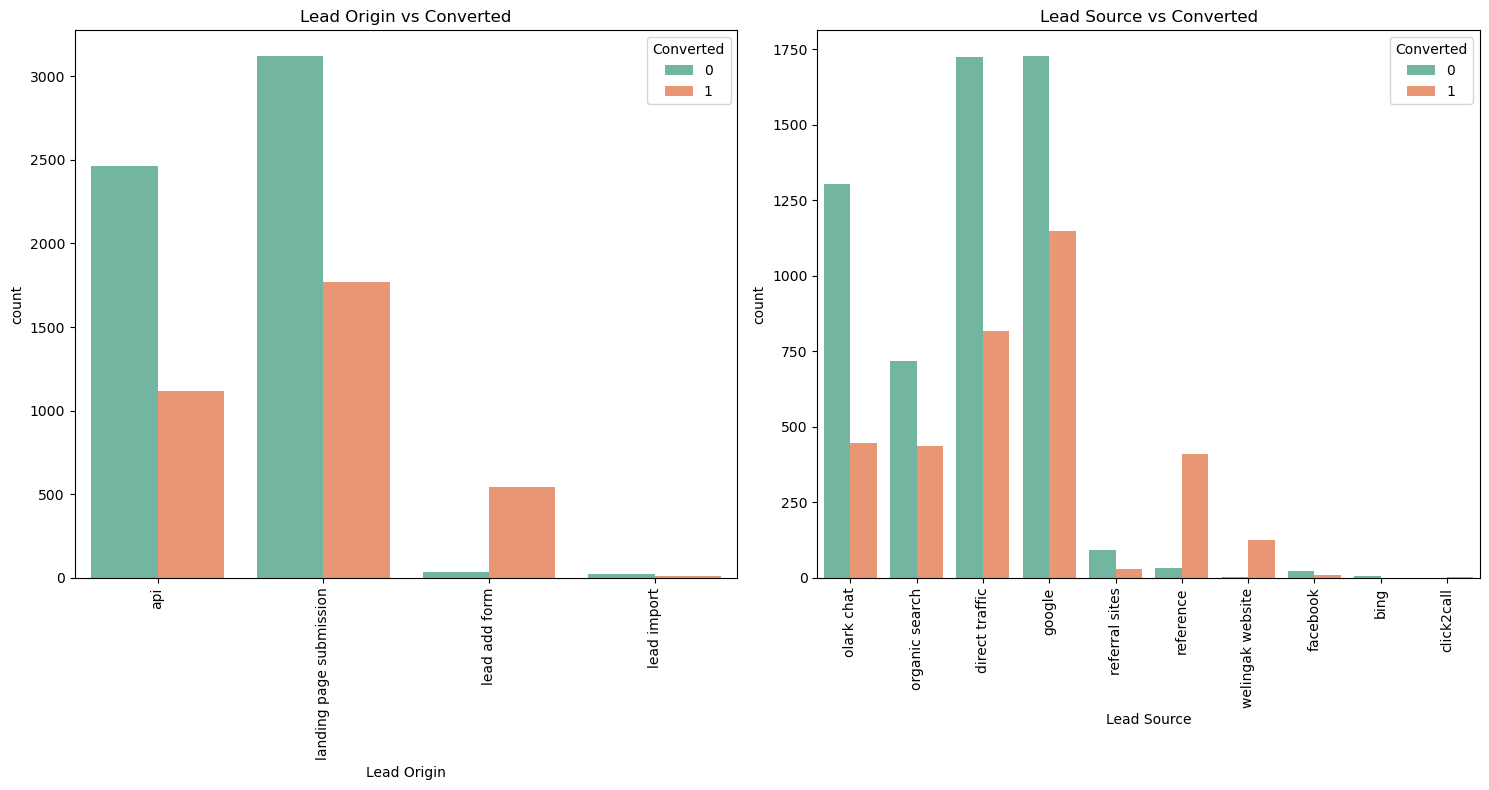

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure no missing values in the relevant columns
df_final['Lead Origin'] = df_final['Lead Origin'].fillna('Unknown').astype(str)  # Ensuring it's a string and fill NaNs
df_final['Lead Source'] = df_final['Lead Source'].fillna('Unknown').astype(str)  # Ensuring it's a string and fill NaNs
df_final['Converted'] = df_final['Converted'].fillna(0).astype(str)  # Ensure 'Converted' is a string (categorical)

# Double-checking unique values in the categorical columns
print("Lead Origin unique values:", df_final['Lead Origin'].unique())
print("Lead Source unique values:", df_final['Lead Source'].unique())
print("Converted unique values:", df_final['Converted'].unique())

# Limit the number of categories in 'Lead Source' to avoid too many unique values in the plot
top_lead_sources = df_final['Lead Source'].value_counts().nlargest(10).index  # Select top 10 sources for clarity
df_filtered = df_final[df_final['Lead Source'].isin(top_lead_sources)]

# Plotting the countplots with proper formatting
plt.figure(figsize=(15, 8))

# First subplot for 'Lead Origin' vs 'Converted'
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=df_final, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Lead Origin vs Converted')

# Second subplot for 'Lead Source' vs 'Converted'
plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', hue='Converted', data=df_filtered, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Lead Source vs Converted')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


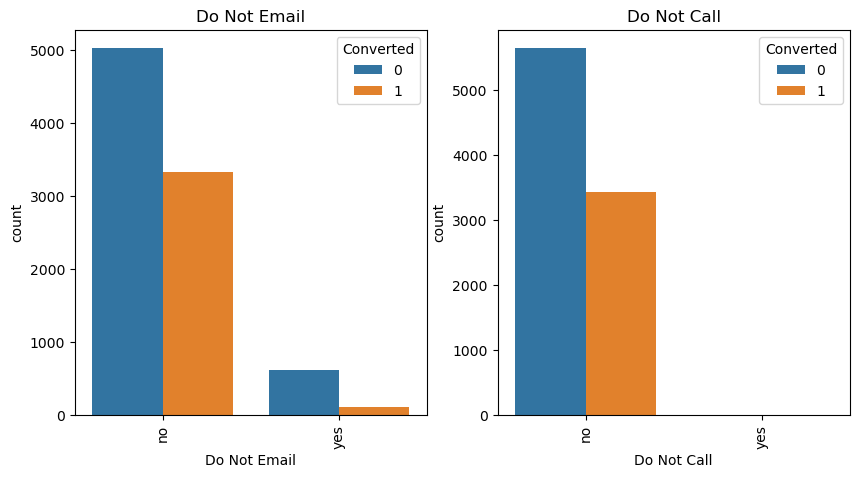

In [409]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

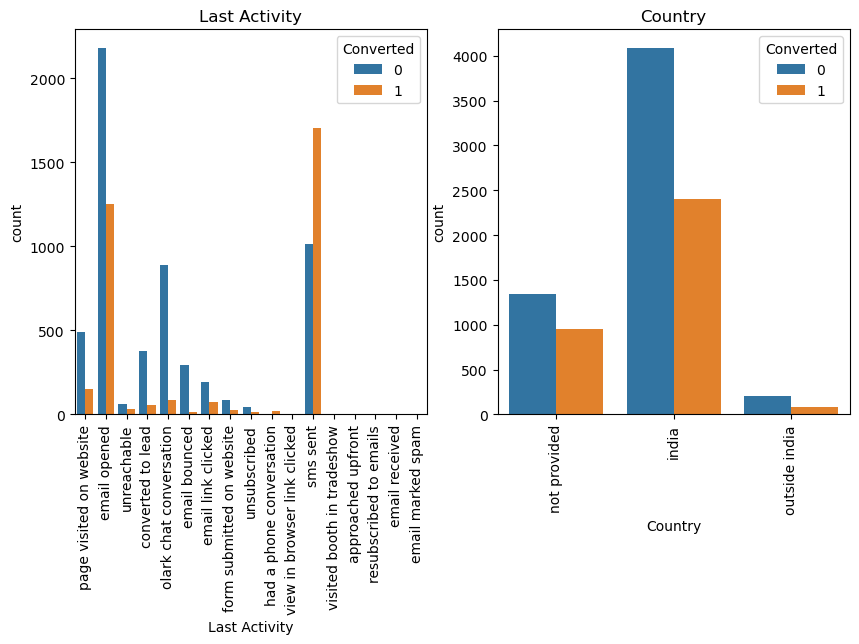

In [410]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

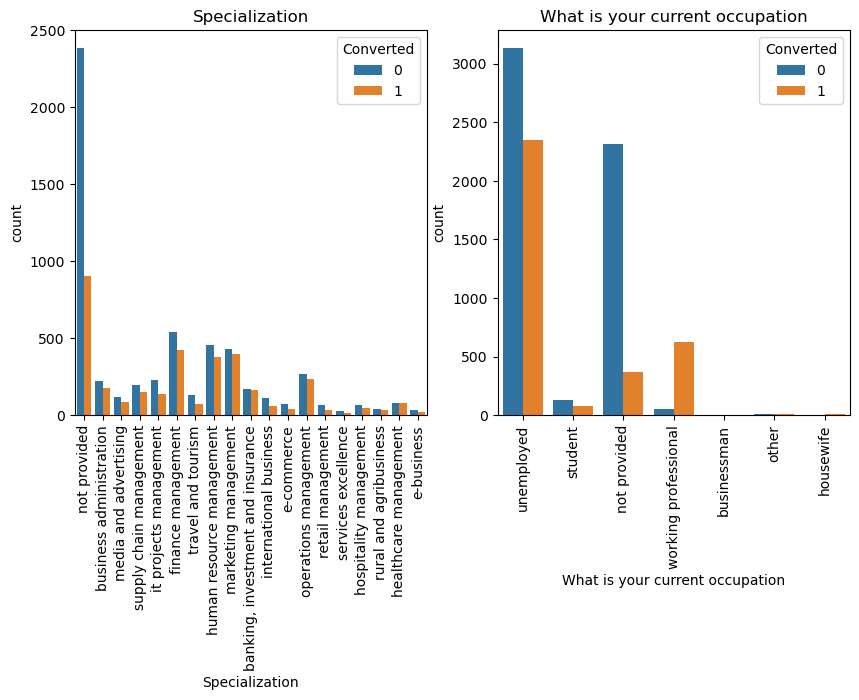

In [411]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

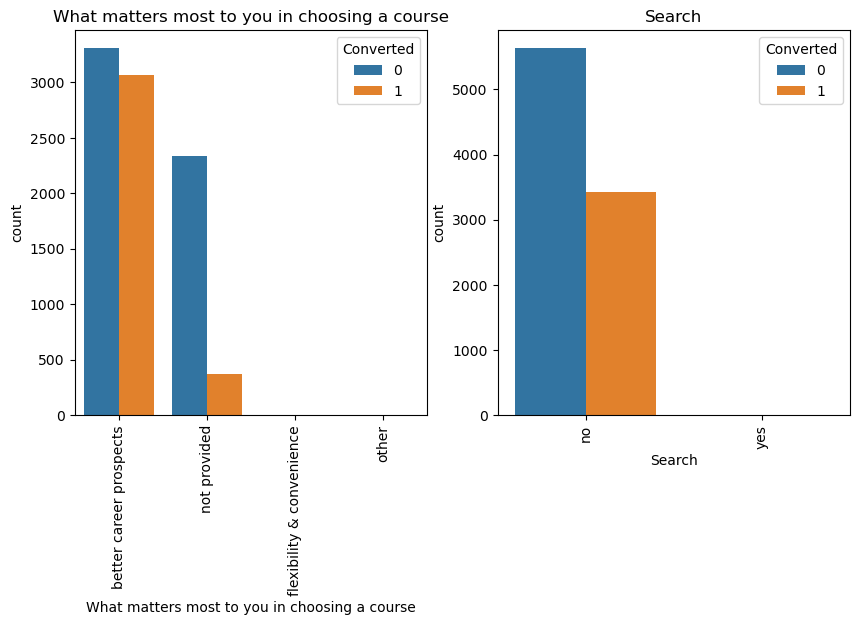

In [412]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

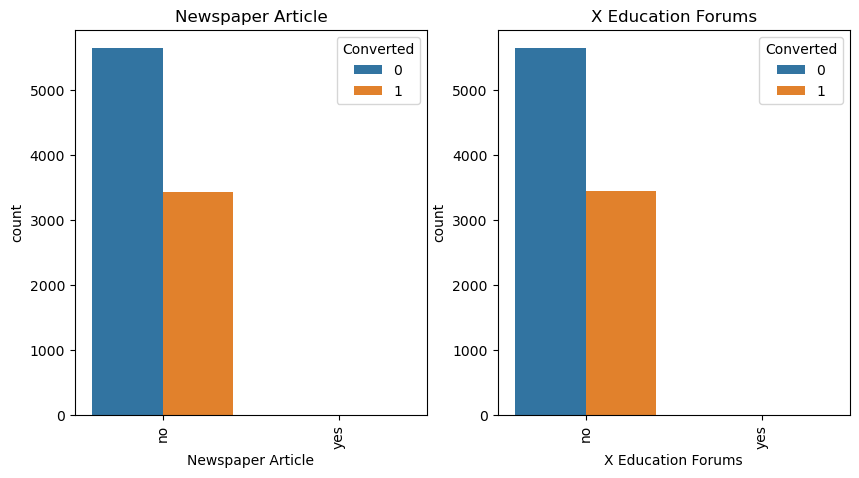

In [413]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

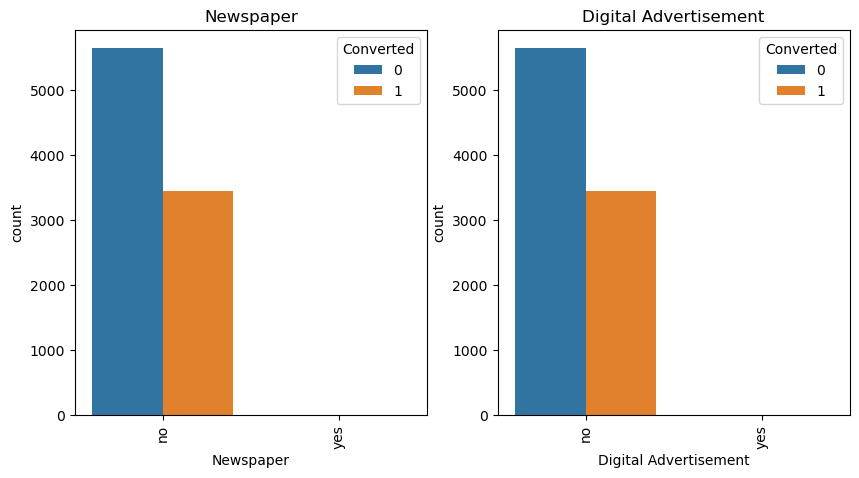

In [414]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

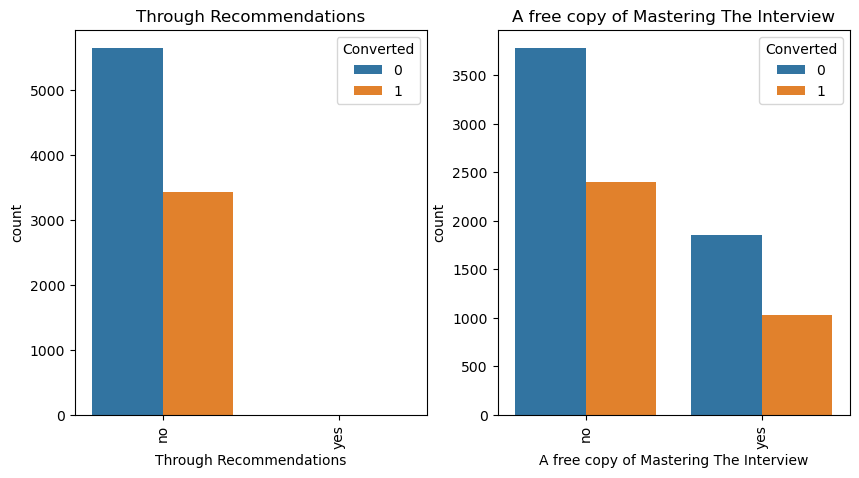

In [415]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

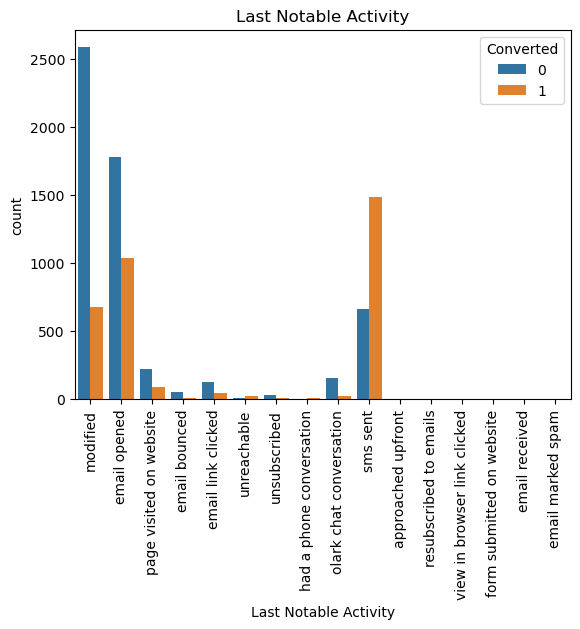

In [416]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

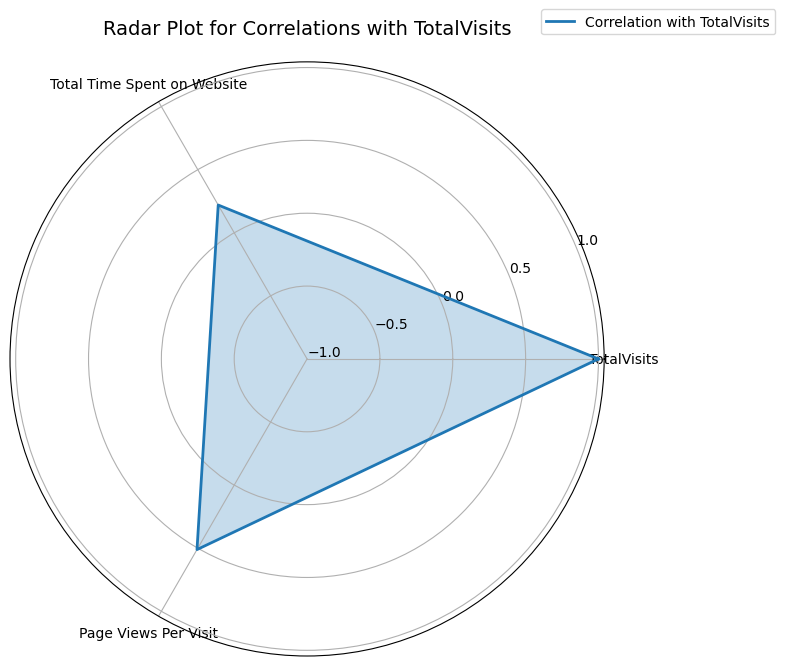

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Select numerical columns and calculate the correlation matrix
numerical_columns = df_final.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_final[numerical_columns].corr()

# Example: Use the first row of the correlation matrix for radar plot
target_column = numerical_columns[0]  # Select the target column
correlation_values = corr_matrix[target_column].values

# Number of variables
num_vars = len(numerical_columns)

# Angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop for the radar chart
correlation_values = np.append(correlation_values, correlation_values[0])
angles += angles[:1]

# Initialize radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data
ax.plot(angles, correlation_values, linewidth=2, linestyle='solid', label=f'Correlation with {target_column}')
ax.fill(angles, correlation_values, alpha=0.25)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(numerical_columns, fontsize=10)
ax.set_yticks(np.linspace(-1, 1, 5))  # Correlation range: -1 to 1
ax.set_title(f'Radar Plot for Correlations with {target_column}', size=14, pad=20)

# Display the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()



<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [418]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [419]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   object 
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [420]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [421]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [422]:
# Use axis=1 to drop columns
df_final_dum = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

# Check the resulting DataFrame
df_final_dum


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## 4. Test-Train Split

In [423]:
# Import the required library
from sklearn.model_selection import train_test_split

In [424]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [425]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: object

In [426]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [427]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [428]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


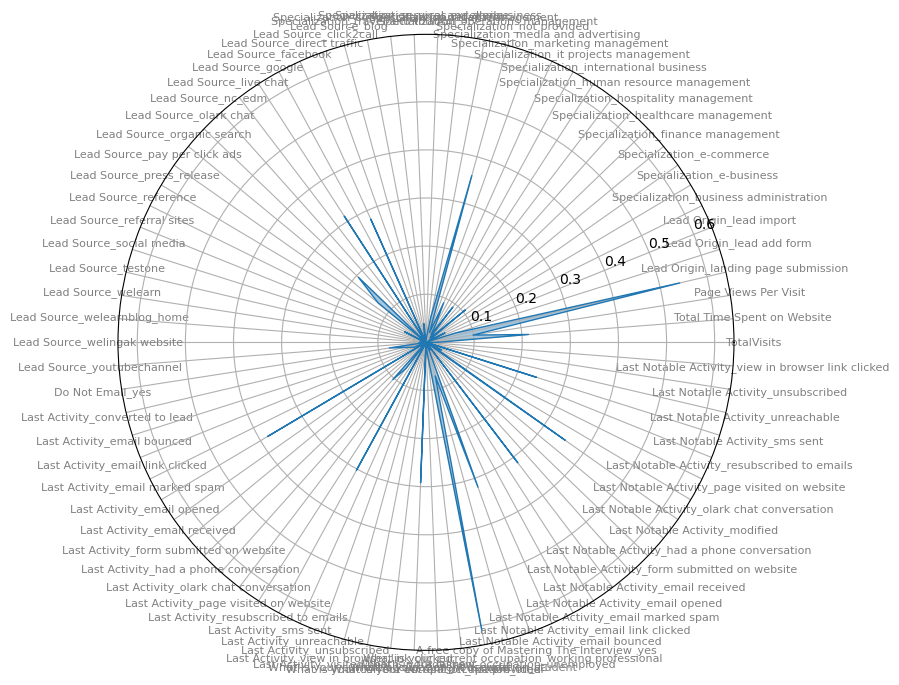

In [429]:
import pandas as pd
from math import pi

# Normalize the data
data_norm = X_train.mean().to_frame().T
categories = list(data_norm.columns)
values = data_norm.values.flatten().tolist()

# Radar chart setup
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
values += values[:1]  # Close the loop
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='gray', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, alpha=0.4)
plt.show()






<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [430]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [431]:
# Import RFE
from sklearn.feature_selection import RFE

In [432]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg = LogisticRegression()

# Initialize RFE with Logistic Regression and set the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to the training data
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features: ", selected_features)

# Rank of features
print("Feature Ranking: ", rfe.ranking_)


Selected Features:  Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_olark chat', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_not provided',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')
Feature Ranking:  [ 1  1  4  1  1 42 48 57 60 50 56  6 49 36 55 64 29  2 54 17 65 34 53 47
 33 63 21 40 23 35 67  1 22 66 44  7 24 27 32 31 41  1 39  1 13 10 46 26
 61 51 19  1  1 18 16  1 20 59 62 45  1  1 28 15 14  1 43 37  9 30 12 58
 52  1  5  8 11  3 38  1 25 68]


In [433]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 42),
 ('Specialization_business administration', False, 48),
 ('Specialization_e-business', False, 57),
 ('Specialization_e-commerce', False, 60),
 ('Specialization_finance management', False, 50),
 ('Specialization_healthcare management', False, 56),
 ('Specialization_hospitality management', False, 6),
 ('Specialization_human resource management', False, 49),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 55),
 ('Specialization_marketing management', False, 64),
 ('Specialization_media and advertising', False, 29),
 ('Specialization_not provided', False, 2),
 ('Specialization_operations management', False, 54),
 ('Specialization_retail management', False, 17),
 ('Specialization_rural and agribusi

In [434]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [435]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [436]:
# Importing statsmodels
import statsmodels.api as sm

In [437]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)

In [438]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3117.6
Date:                Sun, 19 Jan 2025   Deviance:                       6235.1
Time:                        23:39:46   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2972
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5298      0.073     -7.218      0.000      -0.674      -0.386
TotalVisits                                            -19.0534   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Total Time Spent on Website                            -23.0779   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_landing page submission                     -0.2789      0.079     -3.547      0.000      -0.433      -0.125
Lead Origin_lead add form                                2.0905      0.221      9.467      0.000       1.658       2.523
Lead Source_olark chat                                  -0.0132      0.102     -0.129      0.897      -0.214       0.187
Lead Source_welingak website                             2.5436      1.032      2.464      0.014       0.520       4.567
Do Not Email_yes                                        -1.5112      0.156     -9.665      0.000      -1.818      -1.205
Last Activity_had a phone conversation                   0.8371      0.760      1.101      0.271      -0.653       2.328
Last Activity_olark chat conversation                   -1.3925      0.158     -8.798      0.000      -1.703      -1.082
Last Activity_sms sent                                   1.3205      0.067     19.832      0.000       1.190       1.451
What is your current occupation_housewife               23.0031   2.04e+04      0.001      0.999      -4e+04       4e+04
What is your current occupation_not provided            -1.1928      0.078    -15.298      0.000      -1.346      -1.040
What is your current occupation_working professional     2.5958      0.184     14.087      0.000       2.235       2.957
Last Notable Activity_had a phone conversation          22.2315   1.61e+04      0.001      0.999   -3.16e+04    3.16e+04
Last Notable Activity_unreachable                        1.7288      0.570      3.035      0.002       0.613       2.845
========================================================================================================================
"""

In [439]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [440]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_had a phone conversation,1.89
13,Last Notable Activity_had a phone conversation,1.89
4,Lead Source_olark chat,1.54
2,Lead Origin_landing page submission,1.53
3,Lead Origin_lead add form,1.47
11,What is your current occupation_not provided,1.43
9,Last Activity_sms sent,1.42
8,Last Activity_olark chat conversation,1.38
5,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [441]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [442]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3120.4
Date:                Sun, 19 Jan 2025   Deviance:                       6240.9
Time:                        23:39:47   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2966
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5313      0.073     -7.238      0.000      -0.675      -0.387
TotalVisits                                            -19.0476   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Total Time Spent on Website                            -23.0790   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_landing page submission                     -0.2763      0.079     -3.515      0.000      -0.430      -0.122
Lead Origin_lead add form                                2.0901      0.221      9.463      0.000       1.657       2.523
Lead Source_olark chat                                  -0.0098      0.102     -0.096      0.924      -0.210       0.191
Lead Source_welingak website                             2.5464      1.032      2.467      0.014       0.523       4.570
Do Not Email_yes                                        -1.5164      0.156     -9.695      0.000      -1.823      -1.210
Last Activity_had a phone conversation                   1.8841      0.607      3.105      0.002       0.695       3.073
Last Activity_olark chat conversation                   -1.3928      0.158     -8.800      0.000      -1.703      -1.083
Last Activity_sms sent                                   1.3205      0.067     19.832      0.000       1.190       1.451
What is your current occupation_housewife               23.0030   2.04e+04      0.001      0.999      -4e+04       4e+04
What is your current occupation_not provided            -1.1944      0.078    -15.316      0.000      -1.347      -1.042
What is your current occupation_working professional     2.5948      0.184     14.080      0.000       2.234       2.956
Last Notable Activity_unreachable                        1.7289      0.570      3.036      0.002       0.613       2.845
========================================================================================================================
"""

In [443]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_olark chat,1.54
2,Lead Origin_landing page submission,1.53
3,Lead Origin_lead add form,1.47
11,What is your current occupation_not provided,1.43
9,Last Activity_sms sent,1.42
8,Last Activity_olark chat conversation,1.38
5,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
6,Do Not Email_yes,1.09
13,Last Notable Activity_unreachable,1.01


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [444]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [445]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3125.1
Date:                Sun, 19 Jan 2025   Deviance:                       6250.3
Time:                        23:39:47   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5260      0.073     -7.174      0.000      -0.670      -0.382
TotalVisits                                            -17.0479   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Total Time Spent on Website                            -21.0804   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_landing page submission                     -0.2757      0.079     -3.511      0.000      -0.430      -0.122
Lead Origin_lead add form                                2.0942      0.221      9.487      0.000       1.662       2.527
Lead Source_olark chat                                  -0.0122      0.102     -0.120      0.905      -0.213       0.188
Lead Source_welingak website                             2.5392      1.032      2.460      0.014       0.516       4.562
Do Not Email_yes                                        -1.5191      0.156     -9.714      0.000      -1.826      -1.213
Last Activity_had a phone conversation                   1.8791      0.607      3.097      0.002       0.690       3.068
Last Activity_olark chat conversation                   -1.3956      0.158     -8.818      0.000      -1.706      -1.085
Last Activity_sms sent                                   1.3160      0.067     19.774      0.000       1.186       1.446
What is your current occupation_not provided            -1.1974      0.078    -15.360      0.000      -1.350      -1.045
What is your current occupation_working professional     2.5905      0.184     14.058      0.000       2.229       2.952
Last Notable Activity_unreachable                        1.7245      0.570      3.027      0.002       0.608       2.841
========================================================================================================================
"""

In [446]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_olark chat,1.54
2,Lead Origin_landing page submission,1.53
3,Lead Origin_lead add form,1.46
10,What is your current occupation_not provided,1.43
9,Last Activity_sms sent,1.42
8,Last Activity_olark chat conversation,1.38
5,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.17
6,Do Not Email_yes,1.09
12,Last Notable Activity_unreachable,1.01


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [447]:
#X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [448]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3125.1
Date:                Sun, 19 Jan 2025   Deviance:                       6250.3
Time:                        23:39:48   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5260      0.073     -7.174      0.000      -0.670      -0.382
TotalVisits                                            -17.0479   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Total Time Spent on Website                            -21.0804   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_landing page submission                     -0.2757      0.079     -3.511      0.000      -0.430      -0.122
Lead Origin_lead add form                                2.0942      0.221      9.487      0.000       1.662       2.527
Lead Source_olark chat                                  -0.0122      0.102     -0.120      0.905      -0.213       0.188
Lead Source_welingak website                             2.5392      1.032      2.460      0.014       0.516       4.562
Do Not Email_yes                                        -1.5191      0.156     -9.714      0.000      -1.826      -1.213
Last Activity_had a phone conversation                   1.8791      0.607      3.097      0.002       0.690       3.068
Last Activity_olark chat conversation                   -1.3956      0.158     -8.818      0.000      -1.706      -1.085
Last Activity_sms sent                                   1.3160      0.067     19.774      0.000       1.186       1.446
What is your current occupation_not provided            -1.1974      0.078    -15.360      0.000      -1.350      -1.045
What is your current occupation_working professional     2.5905      0.184     14.058      0.000       2.229       2.952
Last Notable Activity_unreachable                        1.7245      0.570      3.027      0.002       0.608       2.841
========================================================================================================================
"""

In [449]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_olark chat,1.54
2,Lead Origin_landing page submission,1.53
3,Lead Origin_lead add form,1.46
10,What is your current occupation_not provided,1.43
9,Last Activity_sms sent,1.42
8,Last Activity_olark chat conversation,1.38
5,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.17
6,Do Not Email_yes,1.09
12,Last Notable Activity_unreachable,1.01


<font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Creating Prediction

In [450]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.309662
3604    0.149871
5584    0.028799
7679    0.149871
7563    0.089415
7978    0.687842
7780    0.309662
7863    0.983816
838     0.887409
708     0.371455
dtype: float64

In [451]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30966185, 0.14987137, 0.02879909, 0.14987137, 0.08941482,
       0.68784217, 0.30966185, 0.98381629, 0.88740891, 0.37145474])

In [452]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.309662
1,0,0.149871
2,0,0.028799
3,0,0.149871
4,0,0.089415


In [453]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.309662,0
1,0,0.149871,0
2,0,0.028799,0
3,0,0.149871,0
4,0,0.089415,0


## 7. Model Evaluation

In [454]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [455]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3406,  489],
       [1072, 1384]], dtype=int64)

In [456]:
# Predicted     not_churn    churn
# Actual
# not_churn        3408       487
# churn             1083      1373

In [457]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7542119351283263

<font color= green>___That's around 75% accuracy with is a very good value___</font>

In [458]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [459]:
# Calculating the sensitivity
TP/(TP+FN)

0.5635179153094463

In [460]:
# Calculating the specificity
TN/(TN+FP)

0.8744544287548138

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [461]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [462]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

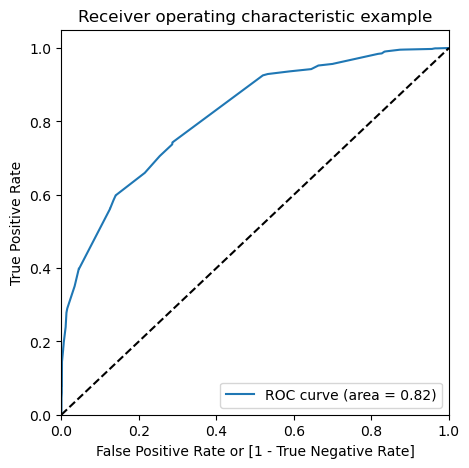

In [463]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.81 which is a very good value.___</font>

In [464]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.309662,0,1,1,1,1,0,0,0,0,0,0
1,0,0.149871,0,1,1,0,0,0,0,0,0,0,0
2,0,0.028799,0,1,0,0,0,0,0,0,0,0,0
3,0,0.149871,0,1,1,0,0,0,0,0,0,0,0
4,0,0.089415,0,1,0,0,0,0,0,0,0,0,0


In [465]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.487325,0.985342,0.173299
0.2,0.2,0.646040,0.929153,0.467522
0.3,0.3,0.652338,0.925489,0.480103
0.4,0.4,0.753897,0.563925,0.873684
0.5,0.5,0.754212,0.563518,0.874454
0.6,0.6,0.753425,0.561075,0.874711
0.7,0.7,0.716108,0.289902,0.984852
0.8,0.8,0.713274,0.279723,0.986650
0.9,0.9,0.679893,0.179560,0.995379


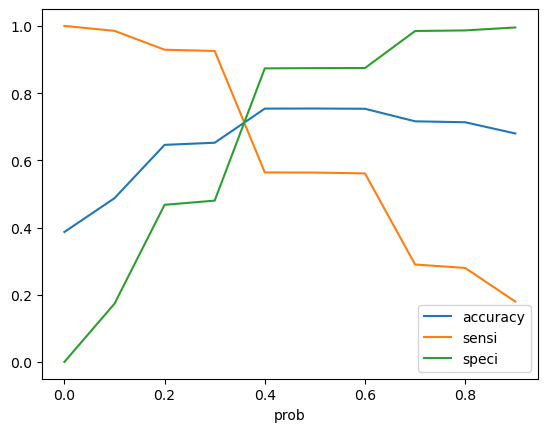

In [466]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [467]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.309662,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.149871,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.028799,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.149871,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.089415,0,1,0,0,0,0,0,0,0,0,0,0


In [468]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7304361517871202

In [469]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2906,  989],
       [ 723, 1733]], dtype=int64)

In [470]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [471]:
# Calculating the sensitivity
TP/(TP+FN)

0.7056188925081434

In [472]:
# Calculating the specificity
TN/(TN+FP)

0.7460847240051348

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 8. Prediction on Test set

In [473]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [474]:
# Substituting all the columns in the final train model
col = X_train.columns

In [475]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_not provided,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,True,False,False,False,False,False,False,False,False,False,False
7212,1.0,0.028369,0.001320,True,False,False,False,False,False,False,True,False,True,False
2085,1.0,0.000000,0.000000,False,True,False,True,False,False,False,False,False,False,False
4048,1.0,0.028369,0.617077,True,False,False,False,False,False,False,True,False,False,False
4790,1.0,0.028369,0.005282,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,False,True,False,False,False,True,False,False,False,False
8179,1.0,0.170213,0.148768,True,False,False,False,False,False,False,True,True,False,False
6236,1.0,0.000000,0.000000,False,False,True,False,False,False,False,False,True,False,False
5240,1.0,0.078014,0.458627,True,False,False,False,False,False,False,True,False,False,False


In [476]:
X_test_sm = X_test_sm.astype(int)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_not provided,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7212,1,0,0,1,0,0,0,0,0,0,1,0,1,0
2085,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4048,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4790,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [477]:
import statsmodels.api as sm
import pandas as pd

# Adding constant term to the training and test sets

X_train_sm = sm.add_constant(X_train)
X_train_sm = X_train_sm.astype(int)
X_test_sm = sm.add_constant(X_test)  # Add constant to X_test as well
X_test_sm = X_test_sm.astype(int)
y_train=y_train.astype(int)

# Fit the logistic regression model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Storing prediction of the test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Convert predictions to a DataFrame
y_pred_df = pd.DataFrame(y_test_pred)

# Convert y_test to DataFrame for comparison
y_test_df = pd.DataFrame(y_test)

# Reset index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Rename the prediction column
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})

# Display the first few rows of the final DataFrame
print(y_pred_final.head())


  Converted  Conversion_Prob
0         0         0.309662
1         1         0.957093
2         1         0.983816
3         1         0.625821
4         0         0.309662


In [478]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.309662,0
1,1,0.957093,1
2,1,0.983816,1
3,1,0.625821,1
4,0,0.309662,0
...,...,...,...
2718,1,0.126324,0
2719,0,0.335579,0
2720,0,0.149871,0
2721,1,0.625821,1


In [479]:
from sklearn.metrics import accuracy_score

# Ensure the 'Converted' column in y_test_df is in integer format
y_test_df['Converted'] = y_test_df['Converted'].astype(int)

# Create the predicted binary labels by thresholding the predicted probabilities
# Typically, a threshold of 0.5 is used for binary classification
y_pred_final['final_predicted'] = (y_pred_final['Conversion_Prob'] >= 0.5).astype(int)

# Now calculate the accuracy score
accuracy = accuracy_score(y_test_df['Converted'], y_pred_final['final_predicted'])
print(f'Accuracy: {accuracy}')



Accuracy: 0.7803892765332354


In [480]:
# Creating confusion matrix 

# Compute the confusion matrix with correct order of arguments
confusion2 = metrics.confusion_matrix(y_test_df['Converted'], y_pred_final['final_predicted'])
print(confusion2)


[[1540  204]
 [ 394  585]]


In [481]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [482]:
# Calculating the sensitivity
TP/(TP+FN)

0.5975485188968335

In [483]:
# Calculating the specificity
TN/(TN+FP)

0.8830275229357798

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 88%.___</font>

## 9. Precision-Recall

In [484]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3406,  489],
       [1072, 1384]], dtype=int64)

In [485]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7389215162840364

In [486]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5635179153094463

<font color= green>___With the current cut off as 0.35 we have Precision around 73% and Recall around 55%___</font>

### 9.1. Precision and recall tradeoff

In [487]:
from sklearn.metrics import precision_recall_curve

In [488]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int32,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [489]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

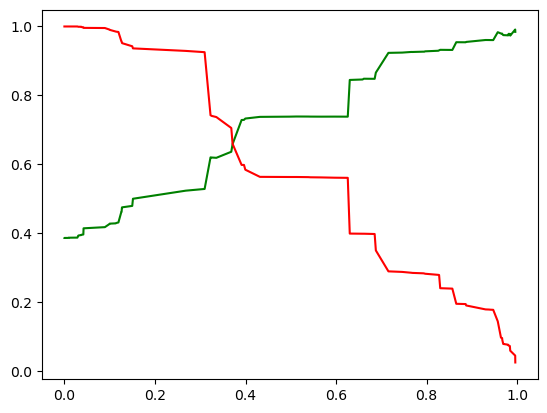

In [490]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [491]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.309662,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.149871,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.028799,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.149871,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.089415,0,1,0,0,0,0,0,0,0,0,0,0


In [492]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7538970240906944

In [493]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3403,  492],
       [1071, 1385]], dtype=int64)

In [494]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [495]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7378795950985615

In [496]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5639250814332247

<font color= green>___With the current cut off as 0.41 we have Precision around 74% and Recall around 56%___</font>

## 10. Prediction on Test set

In [497]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.309662
1,1,0.957093
2,1,0.983816
3,1,0.625821
4,0,0.309662


In [498]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.309662,0
1,1,0.957093,1
2,1,0.983816,1
3,1,0.625821,1
4,0,0.309662,0
...,...,...,...
2718,1,0.126324,0
2719,0,0.335579,0
2720,0,0.149871,0
2721,1,0.625821,1


In [499]:
from sklearn import metrics

# Make sure both columns are of the same type (either int or str)
y_pred_final['Converted'] = y_pred_final['Converted'].astype(int)  # True labels
y_pred_final['final_predicted'] = y_pred_final['final_predicted'].astype(int)  # Predicted labels

# Calculate accuracy score
accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

print("Accuracy:", accuracy)


Accuracy: 0.7792875504957767


In [500]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1536,  208],
       [ 393,  586]], dtype=int64)

In [501]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [502]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7380352644836272

In [503]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5985699693564862

<font color= green>___With the current cut off as 0.41 we have Precision around 75% and Recall around 75%___</font>

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.